In [1]:
pip install pymongo

  Obtaining dependency information for pymongo from https://files.pythonhosted.org/packages/1f/c6/5b50d1874a06d7d129482ecb2b3ea43d9c594e6d56c7cbcae1e6d3d072d7/pymongo-4.11.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for dnspython<3.0.0,>=1.16.0 from https://files.pythonhosted.org/packages/68/1b/e0a87d256e40e8c888847551b20a017a6b98139178505dc7ffb96f04e954/dnspython-2.7.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/831.6 kB ? eta -:--:--
   -- ------------------------------------- 61.4/831.6 kB 1.7 MB/s eta 0:00:01
   ---------------------------- ----------- 593.9/831.6 kB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 831.6/831.6 kB 8.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/313.6 kB ? eta -:--:--
   --------------------------------------- 313.6/313.6 kB 19.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import json
from pymongo import MongoClient

### Step 1: Convert CSV to JSON

In [2]:
def csv_to_json(csv_file, json_file):
    df = pd.read_csv(csv_file)
    df.to_json(json_file, orient='records', lines=True)
    print(f"CSV data converted to JSON and saved as {json_file}")

### Step 2: Insert JSON data into MongoDB

In [3]:
def insert_into_mongodb(json_file, db_name, collection_name):
    client = MongoClient("mongodb://localhost:27017/")
    db = client[db_name]
    collection = db[collection_name]
    
    with open(json_file, 'r') as file:
        data = [json.loads(line) for line in file]
        collection.insert_many(data)
        
    print(f"Inserted {len(data)} records into {db_name}.{collection_name}")

### Step 3: Query the MongoDB collection

In [4]:
def query_mongodb(db_name, collection_name, query={}):
    client = MongoClient("mongodb://localhost:27017/")
    db = client[db_name]
    collection = db[collection_name]
    
    results = collection.find(query)
    print("Query Results:")
    for doc in results:
        print(doc)

### Step 4: Define file paths and database details

In [5]:
if __name__ == "__main__":
    # Step 4: Define file paths and database details
    csv_file = "world_population.csv"
    json_file = "world_population.json"
    db_name = "mydatabase"
    collection_name = "world_population"
    
    # Step 5: Execute functions in order
    csv_to_json(csv_file, json_file)
    insert_into_mongodb(json_file, db_name, collection_name)
    query_mongodb(db_name, collection_name, query={})


CSV data converted to JSON and saved as world_population.json
Inserted 234 records into mydatabase.world_population
Query Results:
{'_id': ObjectId('67caf1615d46d4457cb74470'), 'Rank': 36, 'CCA3': 'AFG', 'Country/Territory': 'Afghanistan', 'Capital': 'Kabul', 'Continent': 'Asia', '2022 Population': 41128771, '2020 Population': 38972230, '2015 Population': 33753499, '2010 Population': 28189672, '2000 Population': 19542982, '1990 Population': 10694796, '1980 Population': 12486631, '1970 Population': 10752971, 'Area (km²)': 652230, 'Density (per km²)': 63.0587, 'Growth Rate': 1.0257, 'World Population Percentage': 0.52}
{'_id': ObjectId('67caf1615d46d4457cb74471'), 'Rank': 138, 'CCA3': 'ALB', 'Country/Territory': 'Albania', 'Capital': 'Tirana', 'Continent': 'Europe', '2022 Population': 2842321, '2020 Population': 2866849, '2015 Population': 2882481, '2010 Population': 2913399, '2000 Population': 3182021, '1990 Population': 3295066, '1980 Population': 2941651, '1970 Population': 2324731, '

### Basic Queries

In [9]:
# Fetch all records
client = MongoClient("mongodb://localhost:27017/")
db = client["mydatabase"]
collection = db["world_population"]


for doc in collection.find():
    print(doc)

{'_id': ObjectId('67caf1615d46d4457cb74470'), 'Rank': 36, 'CCA3': 'AFG', 'Country/Territory': 'Afghanistan', 'Capital': 'Kabul', 'Continent': 'Asia', '2022 Population': 41128771, '2020 Population': 38972230, '2015 Population': 33753499, '2010 Population': 28189672, '2000 Population': 19542982, '1990 Population': 10694796, '1980 Population': 12486631, '1970 Population': 10752971, 'Area (km²)': 652230, 'Density (per km²)': 63.0587, 'Growth Rate': 1.0257, 'World Population Percentage': 0.52}
{'_id': ObjectId('67caf1615d46d4457cb74471'), 'Rank': 138, 'CCA3': 'ALB', 'Country/Territory': 'Albania', 'Capital': 'Tirana', 'Continent': 'Europe', '2022 Population': 2842321, '2020 Population': 2866849, '2015 Population': 2882481, '2010 Population': 2913399, '2000 Population': 3182021, '1990 Population': 3295066, '1980 Population': 2941651, '1970 Population': 2324731, 'Area (km²)': 28748, 'Density (per km²)': 98.8702, 'Growth Rate': 0.9957, 'World Population Percentage': 0.04}
{'_id': ObjectId('67c

#### Get a single document

In [10]:
one_doc = collection.find_one()
print(one_doc)


{'_id': ObjectId('67caf1615d46d4457cb74470'), 'Rank': 36, 'CCA3': 'AFG', 'Country/Territory': 'Afghanistan', 'Capital': 'Kabul', 'Continent': 'Asia', '2022 Population': 41128771, '2020 Population': 38972230, '2015 Population': 33753499, '2010 Population': 28189672, '2000 Population': 19542982, '1990 Population': 10694796, '1980 Population': 12486631, '1970 Population': 10752971, 'Area (km²)': 652230, 'Density (per km²)': 63.0587, 'Growth Rate': 1.0257, 'World Population Percentage': 0.52}


#### Count the number of records

In [11]:
count = collection.count_documents({})
print(f"Total records: {count}")


Total records: 936


#### Find Records with a Condition

In [14]:
query = {"Continent": {"$in": ["Africa", "Asia"]}}
results = collection.find(query)

for doc in results:
    print(doc)


{'_id': ObjectId('67caf1615d46d4457cb74470'), 'Rank': 36, 'CCA3': 'AFG', 'Country/Territory': 'Afghanistan', 'Capital': 'Kabul', 'Continent': 'Asia', '2022 Population': 41128771, '2020 Population': 38972230, '2015 Population': 33753499, '2010 Population': 28189672, '2000 Population': 19542982, '1990 Population': 10694796, '1980 Population': 12486631, '1970 Population': 10752971, 'Area (km²)': 652230, 'Density (per km²)': 63.0587, 'Growth Rate': 1.0257, 'World Population Percentage': 0.52}
{'_id': ObjectId('67caf1615d46d4457cb74472'), 'Rank': 34, 'CCA3': 'DZA', 'Country/Territory': 'Algeria', 'Capital': 'Algiers', 'Continent': 'Africa', '2022 Population': 44903225, '2020 Population': 43451666, '2015 Population': 39543154, '2010 Population': 35856344, '2000 Population': 30774621, '1990 Population': 25518074, '1980 Population': 18739378, '1970 Population': 13795915, 'Area (km²)': 2381741, 'Density (per km²)': 18.8531, 'Growth Rate': 1.0164, 'World Population Percentage': 0.56}
{'_id': Obj

#### Finding Countries with a Condition

In [17]:
query = {"Country/Territory": "Nigeria"}
results = collection.find(query)

for doc in results:
    print(doc)


{'_id': ObjectId('67caf1615d46d4457cb74505'), 'Rank': 6, 'CCA3': 'NGA', 'Country/Territory': 'Nigeria', 'Capital': 'Abuja', 'Continent': 'Africa', '2022 Population': 218541212, '2020 Population': 208327405, '2015 Population': 183995785, '2010 Population': 160952853, '2000 Population': 122851984, '1990 Population': 95214257, '1980 Population': 72951439, '1970 Population': 55569264, 'Area (km²)': 923768, 'Density (per km²)': 236.5759, 'Growth Rate': 1.0241, 'World Population Percentage': 2.74}
{'_id': ObjectId('67cafc705d46d4457cb745f1'), 'Rank': 6, 'CCA3': 'NGA', 'Country/Territory': 'Nigeria', 'Capital': 'Abuja', 'Continent': 'Africa', '2022 Population': 218541212, '2020 Population': 208327405, '2015 Population': 183995785, '2010 Population': 160952853, '2000 Population': 122851984, '1990 Population': 95214257, '1980 Population': 72951439, '1970 Population': 55569264, 'Area (km²)': 923768, 'Density (per km²)': 236.5759, 'Growth Rate': 1.0241, 'World Population Percentage': 2.74}
{'_id'

#### Get all Countries with 2022 Population Greater than 50 Million

In [19]:
query = {"2022 Population": {"$gt": 50000000}}
results = collection.find(query)

for doc in results:
    print(doc)


{'_id': ObjectId('67caf1615d46d4457cb74480'), 'Rank': 8, 'CCA3': 'BGD', 'Country/Territory': 'Bangladesh', 'Capital': 'Dhaka', 'Continent': 'Asia', '2022 Population': 171186372, '2020 Population': 167420951, '2015 Population': 157830000, '2010 Population': 148391139, '2000 Population': 129193327, '1990 Population': 107147651, '1980 Population': 83929765, '1970 Population': 67541860, 'Area (km²)': 147570, 'Density (per km²)': 1160.035, 'Growth Rate': 1.0108, 'World Population Percentage': 2.15}
{'_id': ObjectId('67caf1615d46d4457cb7448b'), 'Rank': 7, 'CCA3': 'BRA', 'Country/Territory': 'Brazil', 'Capital': 'Brasilia', 'Continent': 'South America', '2022 Population': 215313498, '2020 Population': 213196304, '2015 Population': 205188205, '2010 Population': 196353492, '2000 Population': 175873720, '1990 Population': 150706446, '1980 Population': 122288383, '1970 Population': 96369875, 'Area (km²)': 8515767, 'Density (per km²)': 25.2841, 'Growth Rate': 1.0046, 'World Population Percentage':

#### Sort Data in Descending order by Population

In [20]:
results = collection.find().sort("2022 Population", -1)  # -1 for descending order

for doc in results:
    print(doc)


{'_id': ObjectId('67cafdec1e35d8ccc12c4900'), 'Rank': 1, 'CCA3': 'CHN', 'Country/Territory': 'China', 'Capital': 'Beijing', 'Continent': 'Asia', '2022 Population': 1425887337, '2020 Population': 1424929781, '2015 Population': 1393715448, '2010 Population': 1348191368, '2000 Population': 1264099069, '1990 Population': 1153704252, '1980 Population': 982372466, '1970 Population': 822534450, 'Area (km²)': 9706961, 'Density (per km²)': 146.8933, 'Growth Rate': 1.0, 'World Population Percentage': 17.88}
{'_id': ObjectId('67cafc705d46d4457cb74585'), 'Rank': 1, 'CCA3': 'CHN', 'Country/Territory': 'China', 'Capital': 'Beijing', 'Continent': 'Asia', '2022 Population': 1425887337, '2020 Population': 1424929781, '2015 Population': 1393715448, '2010 Population': 1348191368, '2000 Population': 1264099069, '1990 Population': 1153704252, '1980 Population': 982372466, '1970 Population': 822534450, 'Area (km²)': 9706961, 'Density (per km²)': 146.8933, 'Growth Rate': 1.0, 'World Population Percentage': 1

#### Limit Result - Top 5 Most Populated Countries

In [22]:
results = collection.find().sort("2022 Population", -1).limit(5)

for doc in results:
    print(doc)


{'_id': ObjectId('67cafda9910f49d9fb5d0b62'), 'Rank': 1, 'CCA3': 'CHN', 'Country/Territory': 'China', 'Capital': 'Beijing', 'Continent': 'Asia', '2022 Population': 1425887337, '2020 Population': 1424929781, '2015 Population': 1393715448, '2010 Population': 1348191368, '2000 Population': 1264099069, '1990 Population': 1153704252, '1980 Population': 982372466, '1970 Population': 822534450, 'Area (km²)': 9706961, 'Density (per km²)': 146.8933, 'Growth Rate': 1.0, 'World Population Percentage': 17.88}
{'_id': ObjectId('67cafc705d46d4457cb74585'), 'Rank': 1, 'CCA3': 'CHN', 'Country/Territory': 'China', 'Capital': 'Beijing', 'Continent': 'Asia', '2022 Population': 1425887337, '2020 Population': 1424929781, '2015 Population': 1393715448, '2010 Population': 1348191368, '2000 Population': 1264099069, '1990 Population': 1153704252, '1980 Population': 982372466, '1970 Population': 822534450, 'Area (km²)': 9706961, 'Density (per km²)': 146.8933, 'Growth Rate': 1.0, 'World Population Percentage': 1

#### Find Countries with  Name starting with "A"

In [23]:
query = {"Country/Territory": {"$regex": "^A"}}
results = collection.find(query)

for doc in results:
    print(doc)


{'_id': ObjectId('67caf1615d46d4457cb74470'), 'Rank': 36, 'CCA3': 'AFG', 'Country/Territory': 'Afghanistan', 'Capital': 'Kabul', 'Continent': 'Asia', '2022 Population': 41128771, '2020 Population': 38972230, '2015 Population': 33753499, '2010 Population': 28189672, '2000 Population': 19542982, '1990 Population': 10694796, '1980 Population': 12486631, '1970 Population': 10752971, 'Area (km²)': 652230, 'Density (per km²)': 63.0587, 'Growth Rate': 1.0257, 'World Population Percentage': 0.52}
{'_id': ObjectId('67caf1615d46d4457cb74471'), 'Rank': 138, 'CCA3': 'ALB', 'Country/Territory': 'Albania', 'Capital': 'Tirana', 'Continent': 'Europe', '2022 Population': 2842321, '2020 Population': 2866849, '2015 Population': 2882481, '2010 Population': 2913399, '2000 Population': 3182021, '1990 Population': 3295066, '1980 Population': 2941651, '1970 Population': 2324731, 'Area (km²)': 28748, 'Density (per km²)': 98.8702, 'Growth Rate': 0.9957, 'World Population Percentage': 0.04}
{'_id': ObjectId('67c

#### Records with Population above 50 million in Africa

In [24]:
query = {"2022 Population": {"$gt": 50000000}, "Continent": "Africa"}
results = collection.find(query)

for doc in results:
    print(doc)


{'_id': ObjectId('67caf1615d46d4457cb744a7'), 'Rank': 15, 'CCA3': 'COD', 'Country/Territory': 'DR Congo', 'Capital': 'Kinshasa', 'Continent': 'Africa', '2022 Population': 99010212, '2020 Population': 92853164, '2015 Population': 78656904, '2010 Population': 66391257, '2000 Population': 48616317, '1990 Population': 35987541, '1980 Population': 26708686, '1970 Population': 20151733, 'Area (km²)': 2344858, 'Density (per km²)': 42.2244, 'Growth Rate': 1.0325, 'World Population Percentage': 1.24}
{'_id': ObjectId('67caf1615d46d4457cb744a9'), 'Rank': 14, 'CCA3': 'EGY', 'Country/Territory': 'Egypt', 'Capital': 'Cairo', 'Continent': 'Africa', '2022 Population': 110990103, '2020 Population': 107465134, '2015 Population': 97723799, '2010 Population': 87252413, '2000 Population': 71371371, '1990 Population': 57214630, '1980 Population': 43748556, '1970 Population': 34781986, 'Area (km²)': 1002450, 'Density (per km²)': 110.7188, 'Growth Rate': 1.0158, 'World Population Percentage': 1.39}
{'_id': O

#### The Sum of Populations grouped by Continent

In [25]:
pipeline = [
    {"$group": {"_id": "$Continent", "TotalPopulation": {"$sum": "$2022 Population"}}}
]
results = collection.aggregate(pipeline)

for doc in results:
    print(doc)


{'_id': 'Europe', 'TotalPopulation': 2972590152}
{'_id': 'Africa', 'TotalPopulation': 5706923728}
{'_id': 'South America', 'TotalPopulation': 1747266432}
{'_id': 'North America', 'TotalPopulation': 2401184544}
{'_id': 'Oceania', 'TotalPopulation': 180154216}
{'_id': 'Asia', 'TotalPopulation': 18885533096}


#### Bar Chart of the Top 10 Most Populated Countries in 2022

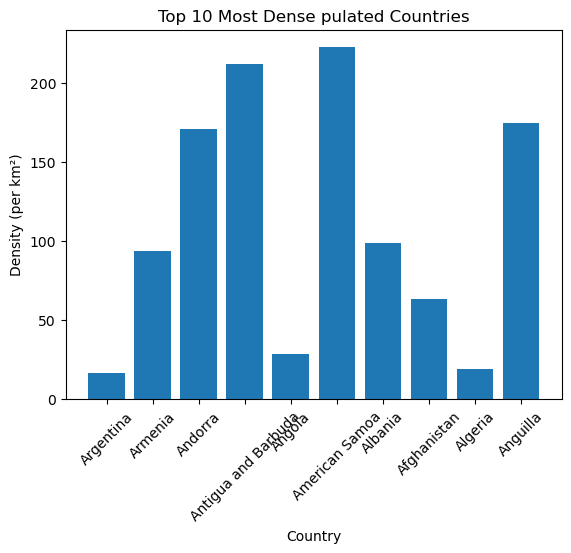

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

results = collection.find().sort("Population", -1).limit(10)

data = pd.DataFrame(results)
plt.bar(data["Country/Territory"], data["Density (per km²)"])
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Density (per km²)")
plt.title("Top 10 Most Dense pulated Countries")
plt.show()
